In [1]:
# imports
import pandas as pd
import seaborn as sns    
import matplotlib.pyplot as plt
import sqlalchemy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# get stopwords
with open('Stopwords.txt', 'r') as f:
    stop_words = f.read().splitlines()

In [3]:
# get sqlite database via sqlalchemy
db = sqlalchemy.create_engine('sqlite:///StaterData.db')

# get data from table
data = pd.read_sql_table("mortgage complaints", db)

In [4]:
# add in DataFrame
df = pd.DataFrame(data)
df.head()

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1,2023-01-10,Mortgage,Conventional home mortgage,Trouble during payment process,None,"Pennymac.com My account was set for auto pay, ...",None,"PENNYMAC LOAN SERVICES, LLC.",CA,XXXXX,None,True,Web,2023-01-31,Closed with explanation,True,True,6414919
1,2,2023-01-10,Mortgage,FHA mortgage,Struggling to pay mortgage,None,Our mortgage company ( LakeviewXXXX ) has set...,Company has responded to the consumer and the ...,"LAKEVIEW LOAN SERVICING, LLC",WA,991XX,Older American,True,Web,2023-01-27,Closed with explanation,True,True,6418853
2,3,2023-02-03,Mortgage,FHA mortgage,Struggling to pay mortgage,None,Received foreclosure notice from foreclosure a...,None,"PLANET HOME LENDING, LLC",TN,XXXXX,None,True,Web,2023-02-03,Closed with explanation,True,True,6527861
3,4,2023-01-06,Mortgage,Reverse mortgage,Trouble during payment process,None,We want to pay off our XXXXXXXX XXXX XXXX XXXX...,None,"Peer Advisors, LLC",CA,91942,None,True,Web,2023-01-26,Closed with explanation,True,True,6407628
4,8,2023-01-24,Mortgage,Conventional home mortgage,Trouble during payment process,None,We purchased our home in XX/XX/XXXX & started ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,FL,32259,Older American,True,Web,2023-01-24,Closed with explanation,True,True,6479592


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104154 entries, 0 to 104153
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         104154 non-null  int64         
 1   Date received                 104154 non-null  datetime64[ns]
 2   Product                       104154 non-null  object        
 3   Sub-product                   104154 non-null  object        
 4   Issue                         104154 non-null  object        
 5   Sub-issue                     104154 non-null  object        
 6   Consumer complaint narrative  104154 non-null  object        
 7   Company public response       104154 non-null  object        
 8   Company                       104154 non-null  object        
 9   State                         104154 non-null  object        
 10  ZIP code                      104154 non-null  object        
 11  Tags         

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,104154.0,1.550335e+05,1.054079e+05,1.0,58057.75,155843.0,231060.75,376168.0
Complaint ID,104154.0,3.372437e+06,1.429823e+06,1290155.0,2205266.25,3131954.0,4263160.25,6884320.0


<AxesSubplot:>

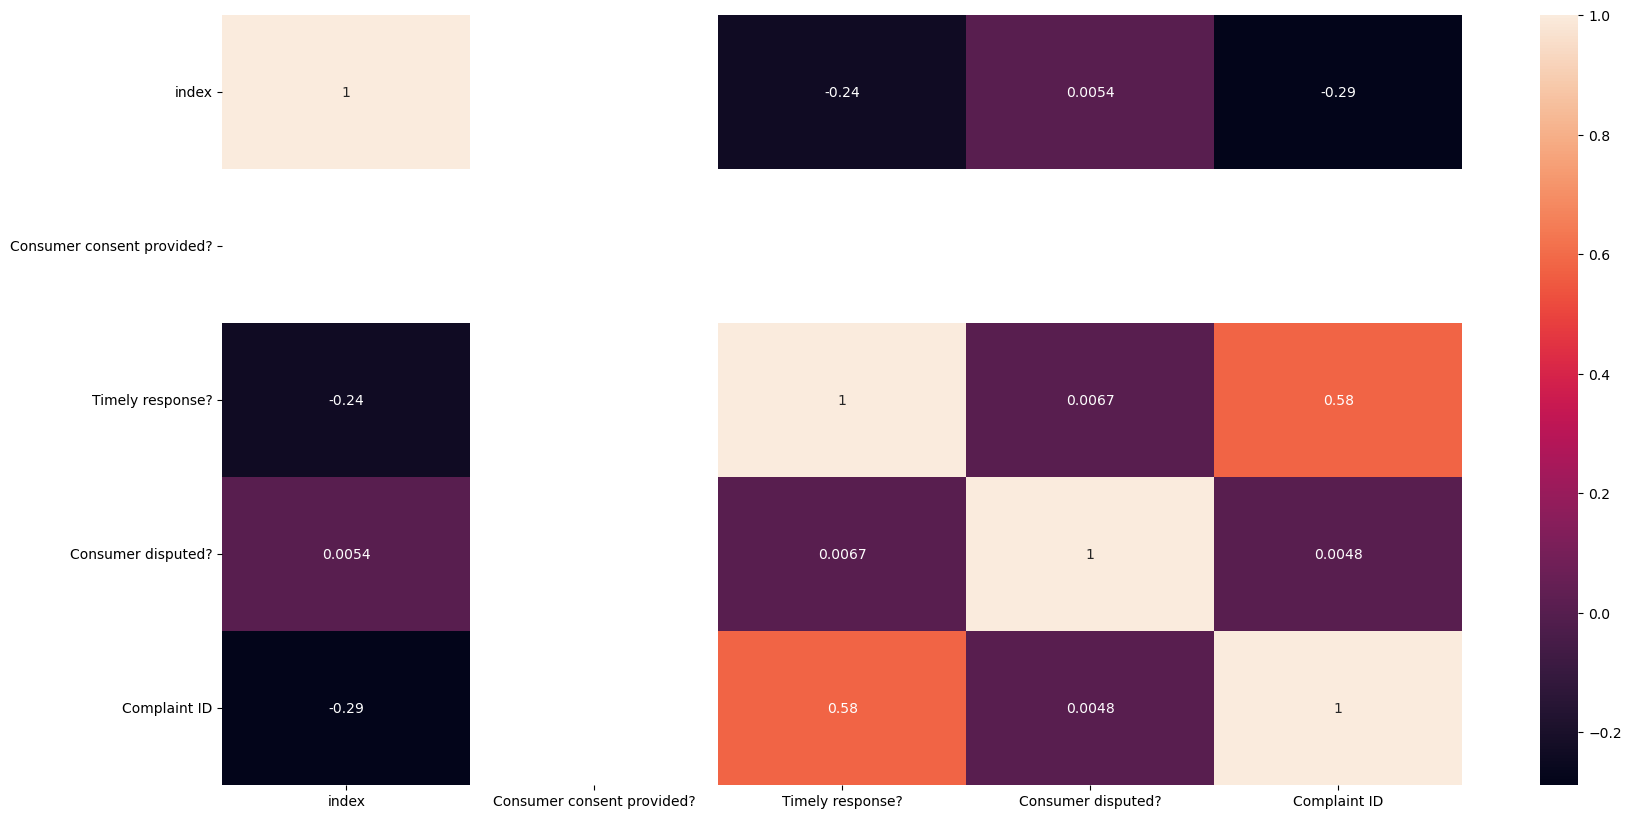

In [7]:
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(),annot= True)

In [8]:
df['Consumer disputed?'].value_counts()

True     102343
False      1811
Name: Consumer disputed?, dtype: int64

In [9]:
extracted_df = df[['Consumer complaint narrative', 'Consumer disputed?']].copy()

In [10]:
x = extracted_df['Consumer complaint narrative']
y = extracted_df['Consumer disputed?']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)

In [12]:
# text to numbers
vect = CountVectorizer(stop_words=stop_words)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [13]:
logregression = LogisticRegression(n_jobs=4)

In [24]:
logregression.fit(X_train, y_train)
logregression.score(X_test, y_test)

0.9775338432489519

In [23]:
y_pred = logregression.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['No', 'Yes'], index=['No', 'Yes'])
cm = cm.transpose()/cm.sum(axis=1)
cm

,No,Yes
No,0.054795,0.004892
Yes,0.945205,0.995108


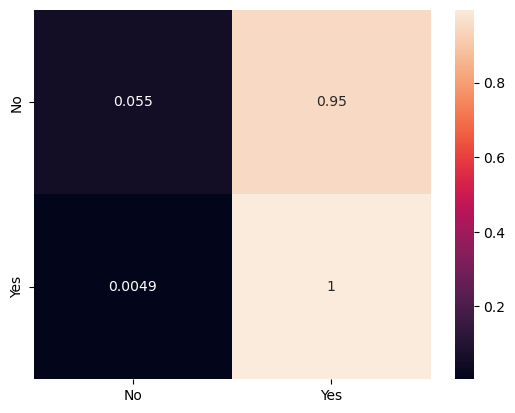

In [16]:
sns.heatmap(cm.transpose(), annot=True)
plt.show()

Bij No is 5.5% correct voorspeld en 95% verkeerd voorspeld.
Bij Yes is het 100% correct voorspeld en 0.05% verkeerd voorspeld.

In [17]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.18      0.05      0.08       584
         Yes       0.98      1.00      0.99     30663

    accuracy                           0.98     31247
   macro avg       0.58      0.52      0.54     31247
weighted avg       0.97      0.98      0.97     31247



In [18]:
f1_score(y_test, y_pred)

0.9886275272161742

In [19]:
accuracy_score(y_test, y_pred)

0.9775338432489519